# Bank Marketing Campaign - A/B Testing Project 





### Project Overview

In this project, we analyze a dataset from a Portuguese bank's telemarketing campaigns, focusing on predicting customer subscription to term deposits. Term deposits are key revenue sources, and effective outreach methods are essential given the high costs of telephonic marketing. Using data collected from previous campaigns, we aim to identify factors that influence customer subscription rates, with particular attention to the impact of the contact channel (telephone vs. cellular) on conversion rates. By understanding these factors, the bank can refine its targeting strategy, optimize resources, and improve campaign effectiveness. 

This analysis involves hypothesis testing to assess the influence of contact methods, call durations, and other factors on customer subscription behavior, ultimately providing actionable insights for future marketing efforts.


<h2 id="import_data">1. Import Libraries and Load Data </h2>


This section will import necessary libraries and load the dataset.

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [6]:
# Load the dataset
data = pd.read_csv('/Users/nando/Desktop/porfolio/Cleaned_train.csv')

# Preview the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no


<h2 id="pattern_visualization">2. Data Exploration </h2>

Analyze the data structure, check for missing values, and get an overview of key statistics.

In [8]:
# Basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        32191 non-null  int64 
 1   job        32191 non-null  object
 2   marital    32191 non-null  object
 3   education  32191 non-null  object
 4   default    32191 non-null  object
 5   balance    32191 non-null  int64 
 6   housing    32191 non-null  object
 7   loan       32191 non-null  object
 8   contact    32191 non-null  object
 9   day        32191 non-null  int64 
 10  month      32191 non-null  object
 11  duration   32191 non-null  int64 
 12  campaign   32191 non-null  int64 
 13  pdays      32191 non-null  int64 
 14  previous   32191 non-null  int64 
 15  poutcome   32191 non-null  object
 16  y          32191 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.2+ MB


In [10]:
# Statistical summary
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000,32191.000000
mean,41.072163,1434.557982,15.986922,260.518095,2.754279,55.930726,0.806157
std,11.057405,3191.590608,8.261942,257.138529,2.980085,112.623239,2.678185
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,82.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,478.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,49.000000,1515.000000,21.000000,322.000000,3.000000,13.500000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,50.000000,871.000000,275.000000


<h2 id="pattern_visualization">3. Data preparation </h2>

 Encode target variables, handle categorical variables, and prepare data for analysis.

In [12]:
# Encode the target variable 'y' as binary
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Verify cleaned data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,0
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,0
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,0
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,0
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,0


<h2 id="pattern_visualization">4.  Exploratory Data Analysis (EDA) </h2>

<b> a) Contact Method Analysis </b>

Visualize the effectiveness of contact type on subscriptions.

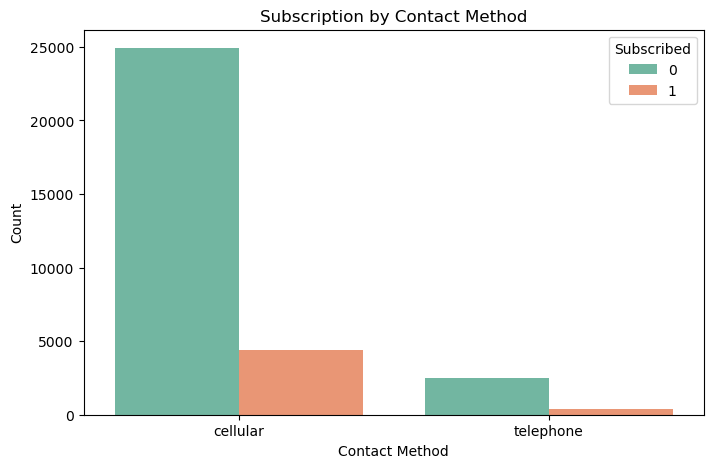

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contact', hue='y', data=data, palette="Set2")
plt.title("Subscription by Contact Method")
plt.xlabel("Contact Method")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

<b> b) Subscription Rate by Age </b>

Visualize the relationship between age and the likelihood of subscribing to a term deposit.

               0     1
age_group             
0-19          29    18
20-29       2879   825
30-39      11338  1706
40-49       6995   920
50-59       5189   699
60-69        683   356
70-79        244   180
80-89         73    48
90-100         2     7


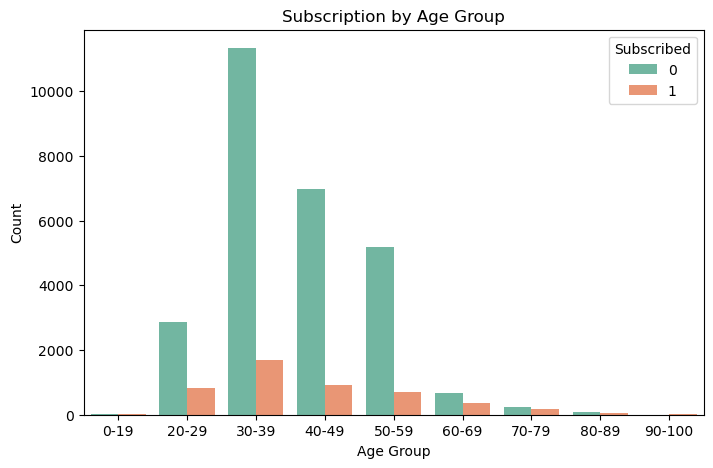

In [18]:
# Define age groups (example ranges)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Calculate subscription counts by age group
age_group_counts = data.groupby('age_group')['y'].value_counts().unstack(fill_value=0)

# Rename the columns to use integers
age_group_counts.columns = [0, 1]  

# Display the counts DataFrame to check its structure
print(age_group_counts)

# Create a countplot for subscription by age group
plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='y', data=data, palette="Set2")
plt.title("Subscription by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Subscribed", labels=['0', '1'])  
plt.show()

<b> c) Subscription Rate by Education Level </b>

Examine how different education levels impact subscription rates

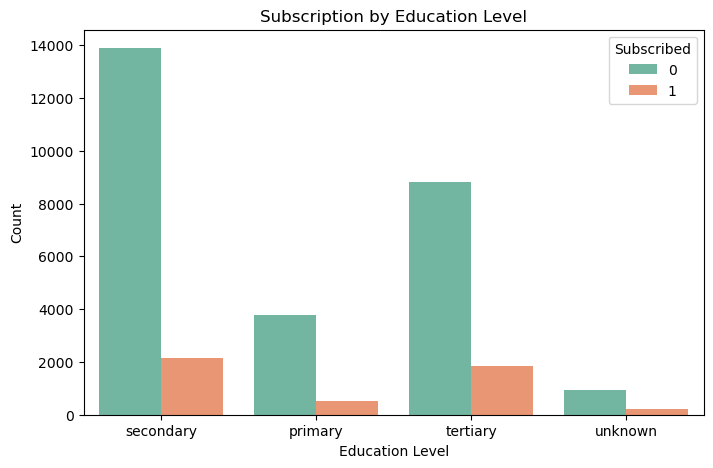

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='education', hue='y', data=data, palette="Set2")
plt.title("Subscription by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

<b> d) Subscription Rate by Job Type </b>

Evaluate subscription tendencies across various job categories.

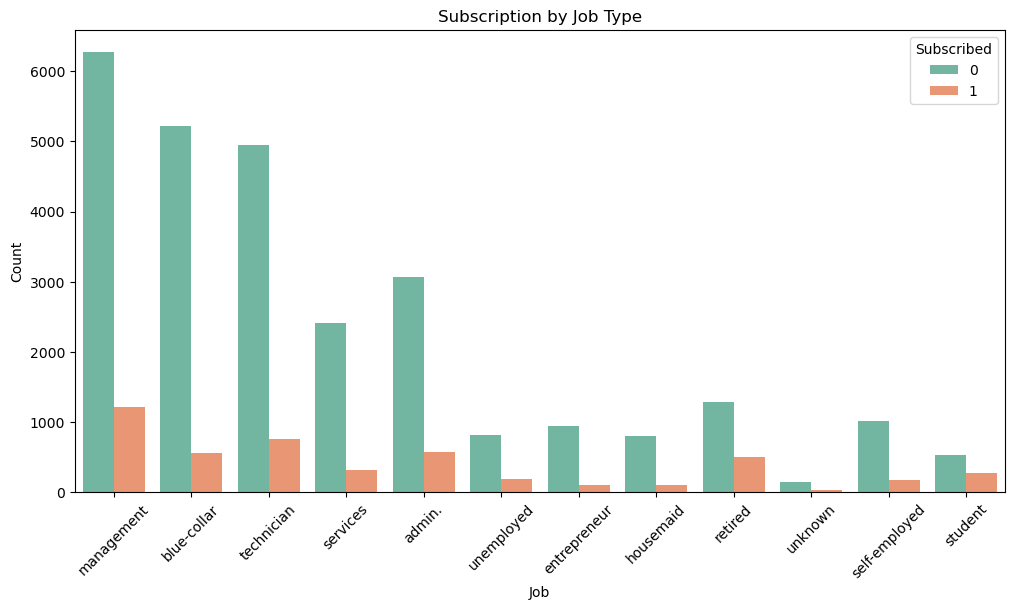

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=data, palette="Set2")
plt.title("Subscription by Job Type")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscribed")
plt.show()

<b> e) Subscription Rate by Marital Status </b>

Explore how marital status correlates with term deposit subscriptions.

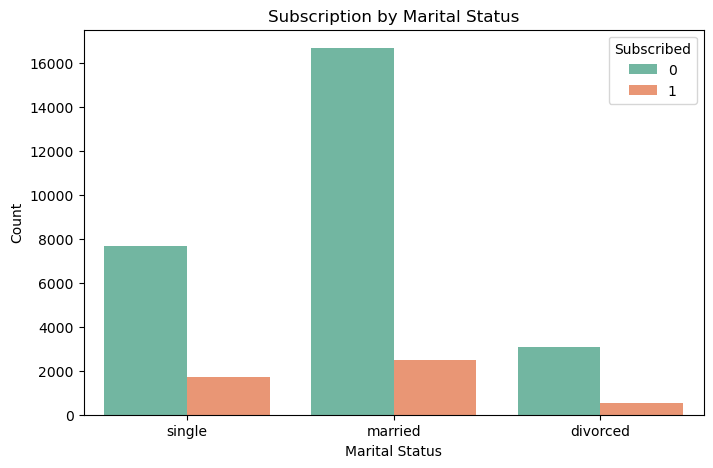

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=data, palette="Set2")
plt.title("Subscription by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.show()

<h2 id="pattern_visualization">5.  Conducting A/B Testing </h2>

Let's first formulate the hypotheses for the A/B testing analysis.

* <b>Null Hypothesis (H0)</b>: There is no significant difference in the conversion rates between customers contacted via telephone and those contacted via cellular.

* <b>Alternative Hypothesis (H1)</b>: There is a significant difference in the conversion rates between customers contacted via telephone and those contacted via cellular.

 Create A/B testing groups based on the "contact" feature (telephone vs. cellular).

In [19]:
# Define groups based on contact channel without encoding
group_A = data[data['contact'] == 'telephone']
group_B = data[data['contact'] == 'cellular']

# Check the size of each group
print("Size of Group A (telephone):", len(group_A))
print("Size of Group B (cellular):", len(group_B))

Size of Group A (telephone): 2906
Size of Group B (cellular): 29285


Now calculate the conversion rate for each group to see if there are differences between the two contact methods.

In [21]:
# Conversion rate for each group
conversion_A = group_A['y'].mean()
conversion_B = group_B['y'].mean()

print("Conversion rate for Group A (telephone):", conversion_A)
print("Conversion rate for Group B (cellular):", conversion_B)

Conversion rate for Group A (telephone): 0.13420509291121818
Conversion rate for Group B (cellular): 0.14918900460986853


<b> a) Significance Testing (Z-test) </b>

we perform a Z-test to see if the difference in conversion rates between the two groups is statistically significant.

In [23]:
# Count of successes and total observations for each group
count_A, count_B = len(group_A), len(group_B)
success_A, success_B = group_A['y'].sum(), group_B['y'].sum()

# Z-test for proportions
z_stat, p_value = proportions_ztest([success_A, success_B], [count_A, count_B])

print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Define the significance level
alpha = 0.05

# Interpretation of results
if p_value < alpha:
    print("The difference is statistically significant. The contact channel affects subscription probability.")
else:
    print("The difference is not statistically significant.")

Z-statistic: -2.170582362740657
P-value: 0.029962756506797035
The difference is statistically significant. The contact channel affects subscription probability.


<b> conclusion 1 </b>

With a p-value of approximately 0.03, which is less than the standard significance level of 0.05, we reject the null hypothesis. This result indicates a statistically significant difference in subscription rates between the telephone and cellular contact methods.

<b> b) Average Call Duration Comparison </b>

Compare the average call duration between the two groups, testing for differences in call duration.

In [25]:
# Calculate the average call duration for each group
duration_A = group_A['duration'].mean()
duration_B = group_B['duration'].mean()

print("Average call duration for Group A (telephone):", duration_A)
print("Average call duration for Group B (cellular):", duration_B)

# T-test for difference in means
t_stat, p_value_duration = stats.ttest_ind(group_A['duration'], group_B['duration'])

print("T-statistic:", t_stat)
print("P-value for duration difference:", p_value_duration)

if p_value_duration < alpha:
    print("The difference in call duration is statistically significant.")
else:
    print("The difference in call duration is not statistically significant.")

Average call duration for Group A (telephone): 235.36613902271162
Average call duration for Group B (cellular): 263.01396619429744
T-statistic: -5.530909584550042
P-value for duration difference: 3.210473628808453e-08
The difference in call duration is statistically significant.


<b> conclusion 2 </b>

The very low p-value here confirms a statistically significant difference in call duration between telephone and cellular contacts. Calls made to cellular numbers are, on average, longer than those to telephone numbers.

<h2 id="pattern_visualization">6.  Conclusions and Recommendations </h2>

Summarize findings and provide data-driven recommendations based on the analysis.

<b> a) Conclusions </b>

* The contact method does indeed influence the likelihood of a customer subscribing to a term deposit. Given this insight, the bank may benefit from tailoring its outreach strategies depending on the contact method’s effectiveness.
* Since longer calls typically require more resources and personnel time, it’s essential to weigh this factor in planning call campaigns. If the cellular contact method is more effective for conversion, the increased time investment might be justifiable.

<b> b) Recommendations </b>

* <b>Prioritize Cellular Outreach for Higher Conversion:</b> Since the cellular contact method has a higher conversion rate, the bank could focus more of its resources on contacting customers via cellular, particularly for campaigns aimed at increasing term deposit subscriptions.

* <b>Optimize Call Duration for Efficiency:</b> If cellular outreach yields better conversions but with significantly longer call durations, the bank might consider training call agents to optimize the duration without compromising the customer experience. This could maximize the conversion benefits while managing resource costs.

* <b>Further Analysis on Other Variables:</b> Consider investigating additional factors, like customer demographics or loan history, to identify other patterns that could inform more personalized campaign strategies.